# 18.065 project: comparison result

In [22]:
#import sys
#!{sys.executable} -m pip install tf-nightly

In [1]:
import sklearn
import numpy as np
from sklearn.datasets import load_iris,make_swiss_roll
from  sklearn.model_selection import train_test_split
# Custom train/test wrappers for sklearn models
from sklearn_wrappers import *

In [2]:
# more readable visuals 
#large = 22; med = 16; small = 10
#params = {'axes.titlesize': large,
#          'legend.fontsize': med,
#          'figure.figsize': (16, 10),
#          'axes.labelsize': med,
#          'axes.titlesize': med,
#          'axes.linewidth': 2,
#          'xtick.labelsize': med,
#          'ytick.labelsize': med,
#          'figure.titlesize': large}
#plt.style.use('seaborn-white')
#plt.rcParams.update(params)
#%matplotlib inline

## Test sweep code

In [2]:
def run_test_sweep(num_dataset_dims, X_train, X_test, is_faces, dataset_name):
    for k in range(1,num_dataset_dims):
        print("Number of components: k =",k)
        
        # SPCA
        best_spca_alpha, best_spca_alpha_err = spca_exp(X_train,X_test,k)
        
        # KPCA
        best_kernel, best_kernel_err = kernel_exp(X_train,X_test,k)
        
        # Autoencoder
        _, best_autoencoder_err = autoencoder_exp(X_train, X_test, k)
        
        # NMF
        _, best_nmf_err = nmf_exp(X_train,X_test,k)
        
        # ==> Summary
        print("- MSE loss summary: ",dataset_name,"is_faces =",is_faces,"k =",k)
        print("-- Sparse PCA (alpha=",best_spca_alpha,"): err=",best_spca_alpha_err)
        print("-- Kernel PCA(",best_kernel,"): err=",best_kernel_err)
        print("-- Autoencoder: err=",best_autoencoder_err)
        print("-- NMF: err=",best_nmf_err)

## Iris dataset: Sparse PCA, Kernel PCA, autoencoder, NMF (TODO); MSE, Frobenius (TODO)

In [3]:
# load Iris dataset
iris = load_iris()
X = iris.data # predictor
y = iris.target #response
num_dataset_dims=4
print('The predictor variable shape: ', X.shape)
print('The response variable shape: ', y.shape)
print('The number of dataset dimensions: ',num_dataset_dims)

# Standardize the data
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

The predictor variable shape:  (150, 4)
The response variable shape:  (150,)
The number of dataset dimensions:  4


Number of components: k = 1
alpha= 0.001 err= 0.0826472708980415
alpha= 0.002 err= 0.0826466705344622
alpha= 0.005 err= 0.08264540833010146
alpha= 0.01 err= 0.08264345100630206
alpha= 0.02 err= 0.08264113612753003
alpha= 0.05 err= 0.08264813744268125
alpha= 0.1 err= 0.08270638352666927
alpha= 0.2 err= 0.08302376158407782
alpha= 0.5 err= 0.08621838642919398
alpha= 1.0 err= 0.09079433196421077
alpha= 2.0 err= 0.14105381969534264
alpha= 5.0 err= 1.0163612085459184


Best SPCA:
- alpha: 0.02
- err: 0.08264113612753003
Kernel PCA ( Linear kernel ) MSE reconstruction loss: 3.279179915025612
- New best kernel
Kernel PCA ( RBF kernel, $\gamma=0.04$ ) MSE reconstruction loss: 0.7346131273178578
- New best kernel
Kernel PCA ( Sigmoid kernel, $\gamma=10^{-3}, r=1$ ) MSE reconstruction loss: 1.0153240167331345


Best MSE reconstruction error: 0.7346131273178578
- Kernel: RBF kernel, $\gamma=0.04$
Model: "model"
_________________________________________________________________
 Layer (type)        

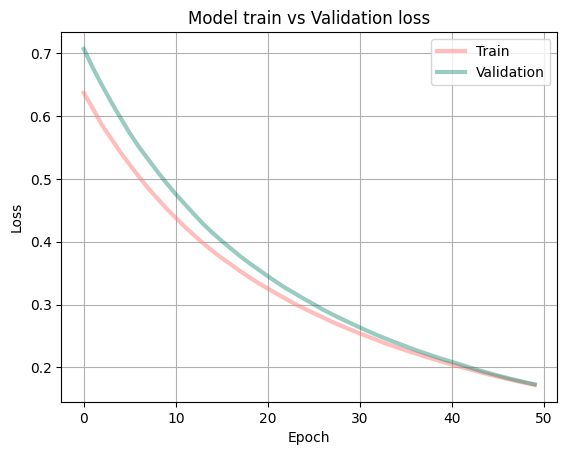

Training loss: 0.17205294966697693
Validation loss: 0.17298555374145508
MSE on training data: 0.17054986925040908
MSE on test data: 0.1492042747333675


Best NMF:
Basis vectors:
 [[6.13900434 3.07112027 4.19712788 1.37931458]]
Coefficients:
 [[0.79394466]
 [0.68199288]
 [0.63132152]
 [0.79517387]
 [0.88524913]
 [1.04985652]
 [0.99042925]
 [0.71002033]
 [1.01187311]
 [0.73512527]
 [0.79839576]
 [0.89952697]
 [0.72806526]
 [1.03426776]
 [0.72637682]
 [0.90320619]
 [1.03152514]
 [1.0523976 ]
 [1.02099552]
 [1.1168954 ]
 [1.35202812]
 [0.88608457]
 [0.7645547 ]
 [1.04610663]
 [1.30180141]
 [1.03980333]
 [1.27943779]
 [0.93092905]
 [1.00257046]
 [1.18976117]
 [1.01930969]
 [1.24022647]
 [1.08679902]
 [0.62963178]
 [0.71885759]
 [1.00011334]
 [1.11482553]
 [0.79057004]
 [1.0583159 ]
 [1.16249884]
 [1.31139052]
 [0.77291946]
 [0.70381201]
 [0.95021552]
 [0.76538564]
 [1.11820596]
 [1.34741812]
 [0.76661486]
 [0.8135279 ]
 [1.15459461]
 [0.89153523]
 [1.2975777 ]
 [0.87810386]
 [0.83065308]
 [

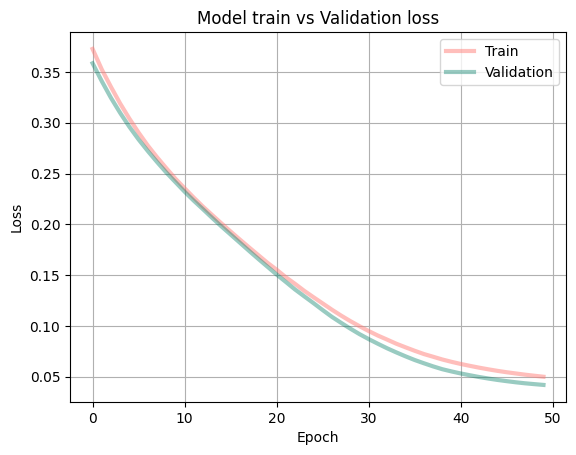

Training loss: 0.0499526746571064
Validation loss: 0.04188777133822441
MSE on training data: 0.04858418427854415
MSE on test data: 0.04461453633653635


Best NMF:
Basis vectors:
 [[2.93456146 0.69216789 3.68805476 1.40830039]
 [1.33553074 0.97912073 0.23897281 0.        ]]
Coefficients:
 [[0.84825945 1.72367699]
 [0.19299001 3.12877272]
 [0.19024747 2.86062759]
 [0.77580477 1.95332059]
 [1.1034876  1.43675641]
 [1.27127016 1.81900302]
 [1.08982464 2.05290279]
 [0.13846484 3.44952586]
 [1.10051681 2.13705139]
 [0.23795572 3.28044155]
 [0.07987766 4.11217654]
 [0.92062075 2.07734001]
 [0.16482392 3.46691683]
 [1.30697263 1.62406906]
 [0.22654691 3.26778967]
 [0.83649971 2.35625566]
 [1.23963731 1.81626908]
 [1.04544266 2.5277089 ]
 [1.0164429  2.44553163]
 [1.4159843  1.73966362]
 [1.61205759 2.41981384]
 [0.81176565 2.33889851]
 [0.11643378 3.81497888]
 [1.18966168 2.04963228]
 [1.67956186 1.93795217]
 [1.18642488 2.02518574]
 [1.55384003 2.2027182 ]
 [0.94962052 2.15951728]
 [1.0118386

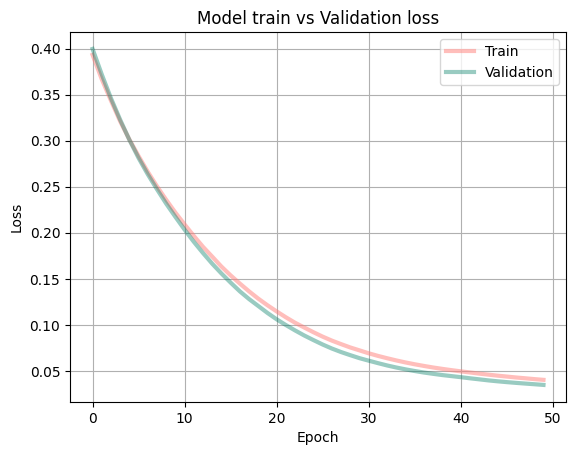

Training loss: 0.040267907083034515
Validation loss: 0.03474776819348335
MSE on training data: 0.03916050453031025
MSE on test data: 0.03254906584137241


Best NMF:
Basis vectors:
 [[2.88209856 0.2696697  2.95775892 0.78473061]
 [1.17393614 0.8438598  0.21686638 0.        ]
 [0.44242486 3.70729058 4.32761488 4.11114017]]
Coefficients:
 [[9.76156770e-01 1.83700848e+00 5.22767197e-02]
 [2.30860427e-01 3.55867879e+00 0.00000000e+00]
 [1.97155932e-01 3.26940208e+00 1.96856458e-02]
 [8.53001568e-01 2.12995831e+00 7.56462612e-02]
 [1.04420985e+00 1.55199791e+00 2.35497753e-01]
 [1.35467067e+00 1.91677205e+00 1.59777758e-01]
 [1.28359925e+00 2.16247883e+00 4.61134601e-02]
 [1.03114767e-01 3.97055904e+00 3.93490382e-02]
 [1.19641023e+00 2.29631449e+00 1.19485738e-01]
 [1.64496671e-01 3.77991899e+00 8.54216590e-02]
 [6.83458099e-02 4.73089747e+00 9.33277335e-03]
 [1.02200335e+00 2.24640415e+00 8.34531912e-02]
 [1.82847609e-01 3.96619382e+00 5.02692131e-03]
 [1.21637537e+00 1.75791678e+00 2.9381

/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [4]:
# Run Iris test sweep
run_test_sweep(num_dataset_dims, X_train, X_test, is_faces=False, dataset_name="iris")

Training time:
- scale X => X_scaled
- Fit to X_scaled

Run time:
- scale X => X_scaled
- Feed X_scaled to model
- Get X_pre_image from model
- Feed X_pre_image to inverse scaler => X_pre_image_unscaled
- MSE(X, X_pre_image_unscaled)


Dimensionality reduction & scalers are fit to trained data

## Swiss roll dataset: Sparse PCA, Kernel PCA, autoencoder

In [ ]:
# Drawing on inspiration from https://docs.google.com/document/d/1lmaQowAhgf1OLbnSjl3X20j1idh-BdaQPZTrJslSJc0/edit "Kernel PCA" section

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
num_dataset_dims=3
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=t, random_state=0)

In [ ]:
# Run Swiss roll test sweep
run_test_sweep(num_dataset_dims, X_train, X_test, is_faces=False, dataset_name="swiss")